In [1]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import json
from pathlib import Path
from PIL import Image
from MVALM.evaluation.zero_shot.zero_shot_data import get_classes

root = Path('/media/ts/SSD_ubuntu/datasets/')
# https://github.com/KaiyangZhou/CoOp/blob/main/DATASETS.md#fgvcaircraft

# Flowers102
Download and put in root / 'Flowers102':
* IMAGE_URL = "https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz"
* LABELS_URL = "https://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat"
* SPLIT_URL = "https://www.robots.ox.ac.uk/~vgg/data/flowers/102/setid.mat"

In [8]:
label_mat = loadmat(root / 'Flowers102' / 'imagelabels.mat')
split_mat = loadmat(root / 'Flowers102' / 'setid.mat')
image_paths = list((root / 'Flowers102' / 'images' ).iterdir())

In [22]:
train_split = split_mat['trnid'].flatten() - 1
val_split = split_mat['valid'].flatten() - 1
test_split = split_mat['tstid'].flatten() - 1
labels = label_mat['labels'].flatten() - 1
train_split.shape, val_split.shape, test_split.shape, labels.shape

((1020,), (1020,), (6149,), (8189,))

In [23]:
filename = 'image_{0:05d}.jpg'
flowers102 = pd.DataFrame([dict(filename=filename.format(i + 1), target=target) for i, target in enumerate(labels)])
flowers102['split'] = None
flowers102.loc[train_split, 'split']= 'train'
flowers102.loc[test_split, 'split'] = 'test'
flowers102.loc[val_split, 'split'] = 'val'

for split, group in flowers102.groupby('split'):
    group = group.drop(columns=['split'])
    print(f"{split}: {len(group)}")
    group.to_parquet(root / "Flowers102" / f'annot_{split}.parquet', index=False)

test: 6149
train: 1020
val: 1020


Class 64 californian poppy


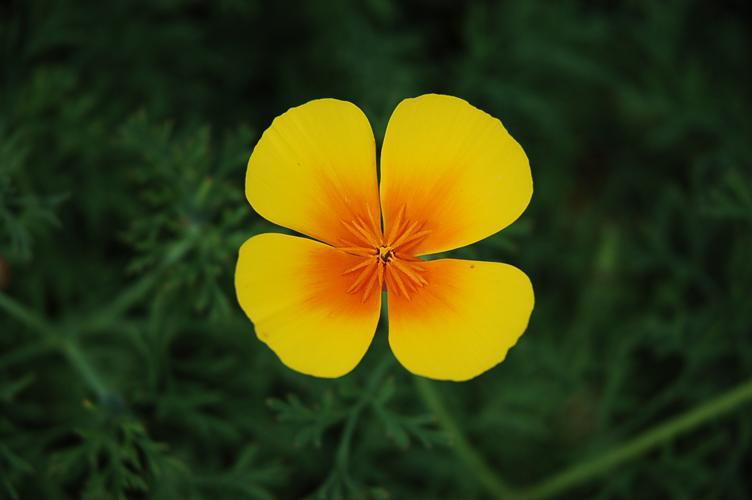

In [36]:
id2class = get_classes('flowers102')
train_df = pd.read_parquet(root / 'Flowers102' / 'annot_train.parquet')
dp = train_df.iloc[245]
print("Class", dp.target, id2class[dp.target])
Image.open(root / 'Flowers102' / 'images' / dp.filename)

# OxfordPet
Download
* IMAGE_URL = "https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz"
* LABELS_URL = "https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz"

In [41]:
test_labels = pd.read_csv(root / 'OxfordPet' / 'annotations' / 'test.txt', sep=" ", header=None,
                          names=['image', 'target', 'species', 'breed'])

train_val_labels = pd.read_csv(root / 'OxfordPet' / 'annotations' / 'trainval.txt', sep=" ", header=None,
                               names=['image', 'target', 'species', 'breed'])
for df in [test_labels, train_val_labels]:
    df['target'] -= 1
    df['species'] -= 1
    df['filename'] = df['image'].apply(lambda x: x + '.jpg')
    df.drop(columns=['breed', 'image'], inplace=True)
train_val_labels.to_parquet(root / 'OxfordPet' / 'annot_train.parquet', index=False)
test_labels.to_parquet(root / 'OxfordPet' / 'annot_test.parquet', index=False)

Class 13 english setter


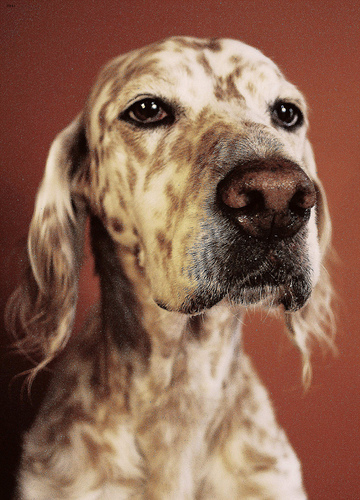

In [48]:
id2class = get_classes('OxfordPet')
train_df = pd.read_parquet(root / 'OxfordPet' / 'annot_train.parquet')

dp = train_df.iloc[678]
print("Class", dp.target, id2class[dp.target])
Image.open(root / 'OxfordPet' / 'images' / dp.filename)

# Caltech 101

In [69]:
with open(root / 'Caltech-101/split_zhou_Caltech101.json', 'r') as f:
    splits = json.load(f)
df = pd.DataFrame(splits['val'], columns=['filename', 'target', 'classname'])
df.classname.value_counts()

motorbike       160
airplane        160
face             87
watch            48
leopard          40
               ... 
platypus          7
octopus           7
binocular         7
inline_skate      6
metronome         6
Name: classname, Length: 100, dtype: int64

In [1]:
from MVALM.datasets.ImageDatasets import ImageNet, ImageNetV2, Flowers102, OxfordPet
from MVALM.evaluation.zero_shot.zero_shot_data import get_classes

In [8]:
ds = Flowers102(datasets_root='/media/ts/SSD_ubuntu/datasets/', split='test')
ds

Dataset: Flowers102, Split: test, Size: 6149, Label: classification

In [9]:
ds = OxfordPet(datasets_root='/media/ts/SSD_ubuntu/datasets/', split='test')
id2class = get_classes(ds.name)
ds

Dataset: OxfordPet, Split: test, Size: 3669, Label: classification

In [3]:
id2class = get_classes('ImageNet')
ds = ImageNet(datasets_root='/media/ts/SSD_ubuntu/datasets/')
ds

Dataset: ImageNet, Split: val, Size: 50000, Label: classification

Otterhound


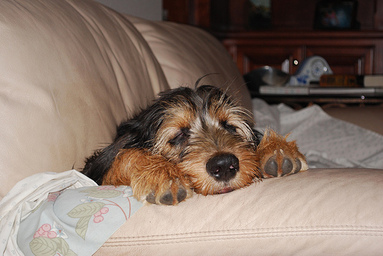

In [4]:
dp = ds[8765]
print(id2class[dp.label])
dp.image

In [9]:
id2class = get_classes('ImageNetV2')
ds = ImageNetV2(datasets_root='/media/ts/SSD_ubuntu/datasets/', label_type='classification')
ds

Dataset: ImageNetV2, Split: test, Size: 10000, Label: classification

Bombay


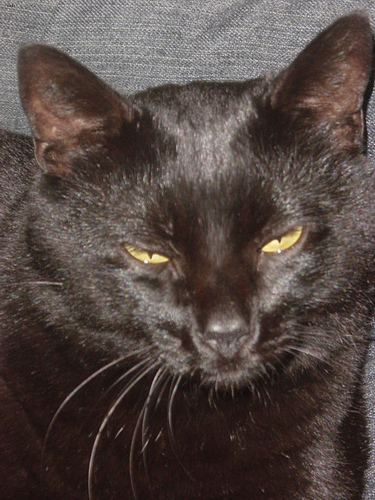

In [12]:
dp = ds[758]
print(id2class[dp.label])
dp.image

In [16]:
from torchvision.transforms import Resize, CenterCrop, Compose
from torchvision.transforms import InterpolationMode

transform = Compose([Resize(224, interpolation=InterpolationMode.BICUBIC),
                     CenterCrop(224)])

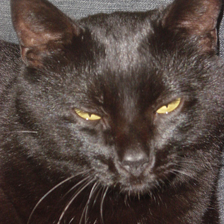

In [17]:
transform(dp.image)